| <h1> Hands-on Activity 11.1 </h1> | <h1> Prepare a Dataset for LSTM and CNN </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019/CPE32S3 <br>
Date Submitted: 05/11/24 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 05/08/24


Objective(s):

 - This activity aims to prepare a dataset for LSTM and CNN time series forecasting. 

Intended Learning Outcomes (ILOs):

1. Demonstrate how to prepare a dataset suitable for LSTM and CNN. 

Resources/Files:
- Jupyter Notebook
- IBM_2006-01-01_to_2018-01-01.csv
    
Scenario:

Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

- Load the dataset and examine it. 
- Check for missing values. 
- Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)
- Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.
- LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements. 
- Reshape the X_train for efficient modeling

Instructions:

- Submit the accomplished Jupyter notebook (PDF). 

Importing necessary libraries

In [33]:
%matplotlib inline

import sys
import statsmodels as s
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Loading the dataset

In [3]:
series = pd.read_csv("C:/Users/user/Documents/HOA 11/IBM_2006-01-01_to_2018-01-01.csv", header=0, index_col=0)

Examining the dataset

<Axes: xlabel='Date'>

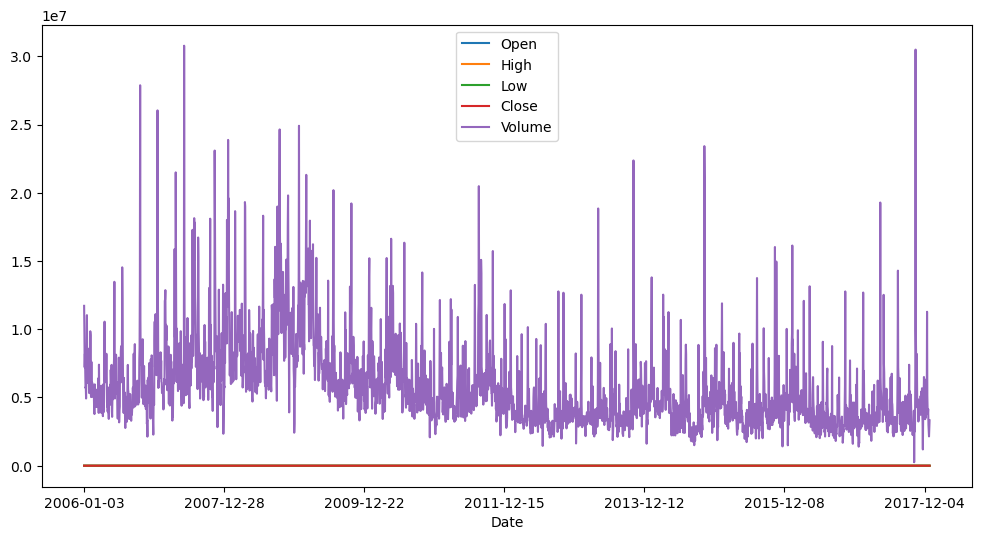

In [21]:
series.plot(figsize = (12,6))

In [5]:
series.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [6]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


Checking for missing values then dropping it

In [8]:
series.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [9]:
series.dropna(inplace = True)

series.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [20]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 229.6+ KB


In [26]:
series.sample(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2008-08-14,125.01,128.25,124.80,126.94,6813232,IBM
2014-01-28,178.05,178.45,176.16,176.85,5336989,IBM
2010-07-07,123.47,127.12,123.47,127.00,7090291,IBM
2010-09-16,129.20,129.95,128.80,129.67,4685578,IBM
2008-04-08,115.72,116.88,115.28,116.27,7283457,IBM
2017-11-20,150.64,151.95,149.90,150.51,5676495,IBM
2014-12-23,162.23,162.90,161.61,162.24,4044220,IBM
2014-08-25,191.39,191.81,190.71,191.16,1726100,IBM
2016-05-09,147.70,148.20,147.01,147.34,4298800,IBM


Dropping the column 'Name'

In [27]:
series.drop(columns=['Name'], inplace=True)

In [28]:
series.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


Splitting the dataset to training set (before 2017) and test set (2017 and beyond)

In [29]:
series.index = pd.to_datetime(series.index)

In [31]:
train_data = series[series.index < '2017-01-01']
test_data = series[series.index >= '2017-01-01']

print(train_data.head())
print(test_data.head())

             Open   High    Low  Close    Volume
Date                                            
2006-01-03  82.45  82.55  80.81  82.06  11715200
2006-01-04  82.20  82.50  81.33  81.95   9840600
2006-01-05  81.40  82.90  81.00  82.50   7213500
2006-01-06  83.95  85.03  83.41  84.95   8197400
2006-01-09  84.10  84.25  83.38  83.73   6858200
              Open    High     Low   Close   Volume
Date                                               
2017-01-03  167.00  167.87  166.01  167.19  2934299
2017-01-04  167.77  169.87  167.36  169.26  3381432
2017-01-05  169.25  169.39  167.26  168.70  2682301
2017-01-06  168.69  169.92  167.52  169.53  2945536
2017-01-09  169.47  169.80  167.62  167.65  3189891


In [32]:
print('Training set shape: ',train_data.shape)
print('Testing set shape: ',test_data.shape)

Training set shape:  (2769, 5)
Testing set shape:  (250, 5)


Scaling the X_train using MinMaxScaler

In [37]:
X_train = train_data.drop(columns=["Close"])
y_train = train_data["Close"]

X_test = test_data.drop(columns=["Close"])
y_test = test_data["Close"]

print('Training set shape: ',X_train.shape, y_train.shape)
print('Testing set shape: ',X_test.shape, y_test.shape)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

Training set shape:  (2769, 4) (2769,)
Testing set shape:  (250, 4) (250,)


In [39]:
print(X_train_scaled)

[[0.06807347 0.06065089 0.07810773 0.35122061]
 [0.06632081 0.06029868 0.0816989  0.2874084 ]
 [0.06071228 0.06311637 0.07941989 0.19798075]
 ...
 [0.66285754 0.66074951 0.66643646 0.01225609]
 [0.65395401 0.65546633 0.66643646 0.00905772]
 [0.65689849 0.6534235  0.66298343 0.05294548]]


Creating a data structure with 60 timesteps and 1 output

In [41]:
timesteps = 60

X_train_lstm = []
y_train_lstm = []

for i in range(timesteps, len(X_train_scaled)):
    X_train_lstm.append(X_train_scaled[i - timesteps:i])
    y_train_lstm.append(y_train[i])

X_train_lstm = np.array(X_train_lstm)
y_train_lstm = np.array(y_train_lstm)

print("Shape of X_train_lstm:", X_train_lstm.shape)
print("Shape of y_train_lstm:", y_train_lstm.shape)

Shape of X_train_lstm: (2709, 60, 4)
Shape of y_train_lstm: (2709,)


Reshaping the X_train for efficient modeling

In [42]:
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 
                                         X_train_lstm.shape[1], 
                                         X_train_lstm.shape[2]))

print("Shape of X_train_lstm after reshaping:", X_train_lstm.shape)

Shape of X_train_lstm after reshaping: (2709, 60, 4)


# Conclusion and Learning

- After performing this activity, I have learned that preparing a dataset for LSTM and CNN time series forecasting involves several crucial steps, including data loading, examination, handling missing values, splitting into training and test sets, scaling, reshaping, and structuring the data appropriately for efficient modeling. In conclusion, this activity has provided me valuable insights into the essential steps involved in preparing a dataset for LSTM and CNN time series forecasting. By following these steps, it will help ensure that the dataset is well-prepared for training accurate and robust predictive models.